# Import modules

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import datetime as dt
from tqdm.notebook import tqdm

# Import data

In [2]:
data = pd.read_csv("data/price.csv")
data["Date"] = pd.to_datetime(data["Date"])
data = data.set_index("Date")
data

,AAPL,MSFT,GOOGL,GOOG,AMZN,BRK.B,UNH,JNJ,XOM,V,...,UPST,TAP,WE,CVNA,NVAX,EHAB,OPEN,UWMC,MBC,FG
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,NaN,13.291009,NaN,NaN,0.264886,NaN,NaN,NaN,1.888242,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.963844,NaN,NaN,NaN
1990-01-03,NaN,13.488728,NaN,NaN,0.266664,NaN,NaN,NaN,1.895060,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.998913,NaN,NaN,NaN
1990-01-04,NaN,13.510702,NaN,NaN,0.267553,NaN,NaN,NaN,1.891651,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.998913,NaN,NaN,NaN
1990-01-05,NaN,13.378882,NaN,NaN,0.268442,NaN,NaN,NaN,1.871201,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.998913,NaN,NaN,NaN
1990-01-08,NaN,13.378882,NaN,NaN,0.270220,NaN,NaN,NaN,1.880794,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.998913,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-20,147.929993,44.090000,12.53,139.380005,132.300003,160.580002,167.380005,87.620003,106.489998,62.240002,...,128.589996,33.619999,125.192581,247.149994,32.669998,28.730000,46.130001,68.559998,113.540001,142.470001
2022-12-21,150.089996,44.869999,13.03,142.289993,135.449997,162.210007,169.320007,87.070000,108.139999,63.360001,...,128.779999,33.950001,126.839455,250.839996,33.049999,29.309999,47.570000,69.930000,112.769997,144.919998
2022-12-22,149.009995,43.849998,12.56,142.080002,132.229996,163.270004,169.270004,84.870003,108.029999,62.849998,...,128.820007,33.459999,126.550003,247.509995,32.439999,28.950001,48.279999,65.940002,109.360001,145.029999


In [3]:
cats = pd.read_csv("data/categorical.csv")
cats = cats.set_index("Unnamed: 0")
cats = cats.rename_axis(None, axis = 0)
cats

,AAPL,MSFT,GOOGL,GOOG,AMZN,BRK.B,UNH,JNJ,XOM,V,...,UPST,TAP,WE,CVNA,NVAX,EHAB,OPEN,UWMC,MBC,FG
sectors,Information Technology,Information Technology,Communication Services,Communication Services,Consumer Discretionary,Financials,Health Care,Health Care,Energy,Information Technology,...,Financials,Consumer Staples,Real Estate,Consumer Discretionary,Health Care,Health Care,Real Estate,Financials,Industrials,Financials


In [4]:
features = pd.read_csv("data/features.csv")
features["Date"] = pd.to_datetime(features["Date"])
features = features.set_index("Date")

# Subtract 1 year from index of features since we want to see the correlation between price and the value of the feature 1 year ago from the date of the stock price (since we are predicting stock price after one year)
features.index = [index - dt.timedelta(days=365) for index in features.index]
features

,BCI,CCI,CLI,3 month interbank rate,Broad money,Construction,Consumer prices,Manufacturing hourly earnings,Industrial production,Long-term interest rate,Manufacturing confidence indicator,Narrow money,Overnight interbank rate,Car registrations,Manufacturing producer prices,Retail trade volume,Total employment,Total manufacturing
1989-01-01,98.82303,100.6509,99.79321,8.16,26.291189,40.385124,53.751419,52.855468,61.105826,8.21,-5.6,26.324891,8.23,138.407385,60.738345,67.509220,119081.0,61.244983
1989-01-02,98.82303,100.6509,99.79321,8.16,26.291189,40.385124,53.751419,52.855468,61.105826,8.21,-5.6,26.324891,8.23,138.407385,60.738345,67.509220,119081.0,61.244983
1989-01-03,98.82303,100.6509,99.79321,8.16,26.291189,40.385124,53.751419,52.855468,61.105826,8.21,-5.6,26.324891,8.23,138.407385,60.738345,67.509220,119081.0,61.244983
1989-01-04,98.82303,100.6509,99.79321,8.16,26.291189,40.385124,53.751419,52.855468,61.105826,8.21,-5.6,26.324891,8.23,138.407385,60.738345,67.509220,119081.0,61.244983
1989-01-05,98.82303,100.6509,99.79321,8.16,26.291189,40.385124,53.751419,52.855468,61.105826,8.21,-5.6,26.324891,8.23,138.407385,60.738345,67.509220,119081.0,61.244983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,98.91054,97.0624,98.88888,4.51,177.318578,164.796803,125.221820,128.973371,100.598801,3.62,-3.2,655.997485,4.10,37.603772,131.749933,118.300105,159244.0,97.682796
2021-12-24,98.91054,97.0624,98.88888,4.51,177.318578,164.796803,125.221820,128.973371,100.598801,3.62,-3.2,655.997485,4.10,37.603772,131.749933,118.300105,159244.0,97.682796
2021-12-25,98.91054,97.0624,98.88888,4.51,177.318578,164.796803,125.221820,128.973371,100.598801,3.62,-3.2,655.997485,4.10,37.603772,131.749933,118.300105,159244.0,97.682796
2021-12-26,98.91054,97.0624,98.88888,4.51,177.318578,164.796803,125.221820,128.973371,100.598801,3.62,-3.2,655.997485,4.10,37.603772,131.749933,118.300105,159244.0,97.682796


# Check amount of stock price data per date

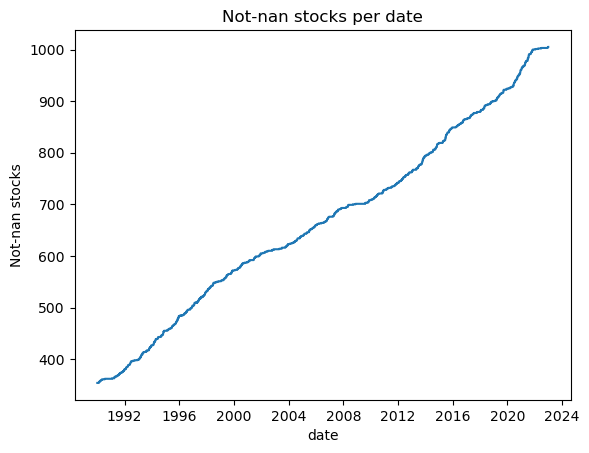

In [5]:
notnan = []
for i in range(len(data)):
    notnan.append(data.shape[1] - data.iloc[i,:].isna().sum())

plt.plot(data.index, notnan)
plt.title("Not-nan stocks per date")
plt.xlabel("date")
plt.ylabel("Not-nan stocks");

# Stock price over time of all stocks

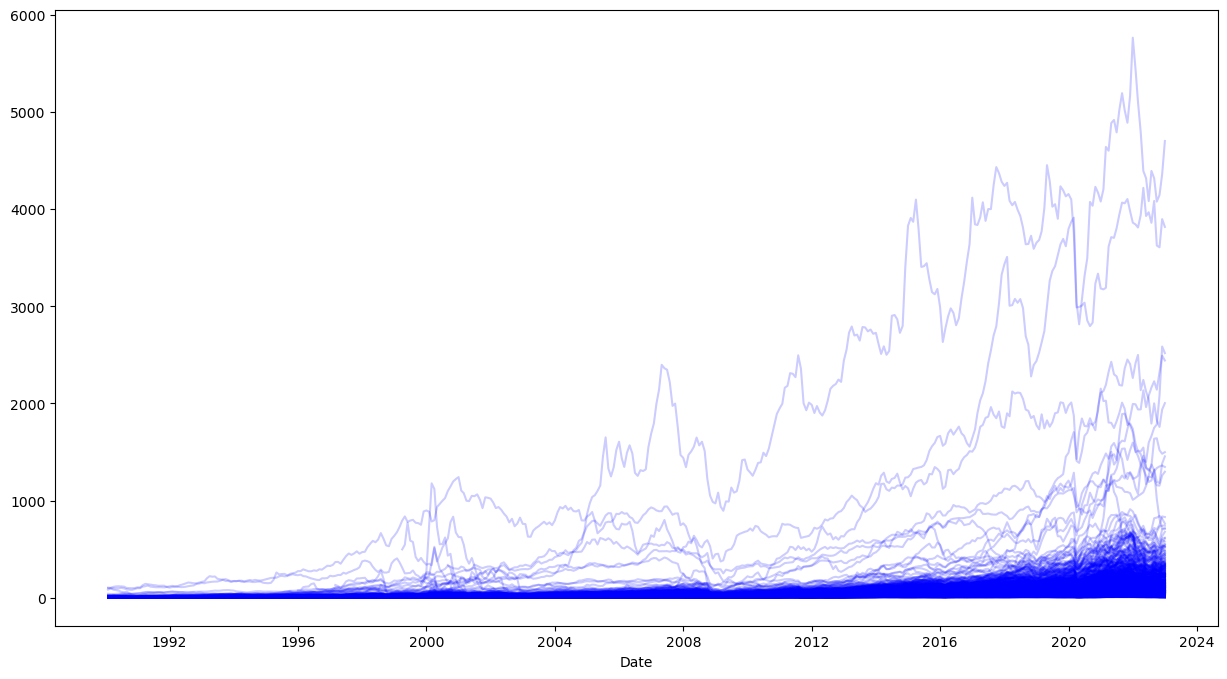

In [6]:
price_monthly_resampling = data.resample("1M").mean()

plt.figure(figsize=(15,8))
sns.lineplot(data=price_monthly_resampling, legend=False, palette=['b']*price_monthly_resampling.shape[1], dashes=False, alpha=0.2);

# Line plots

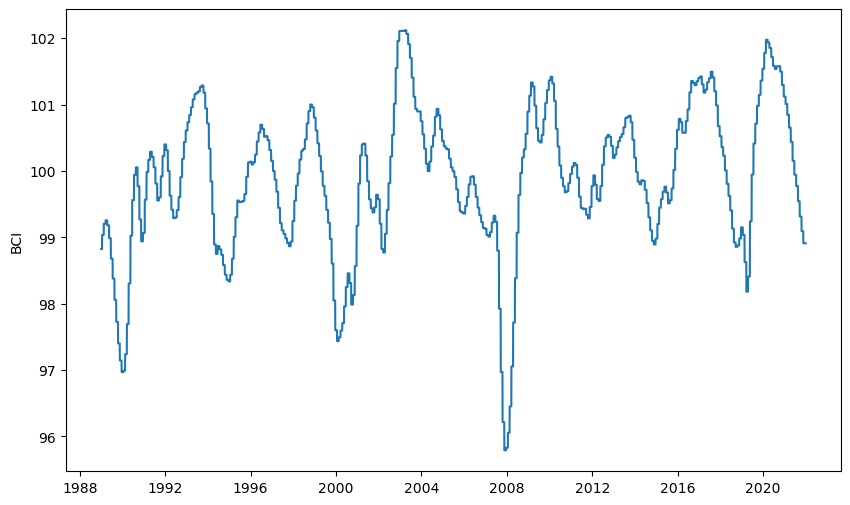

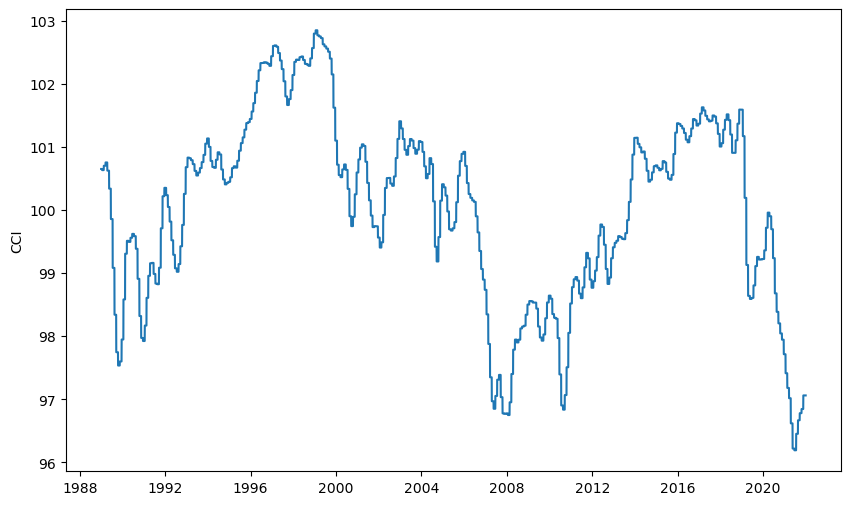

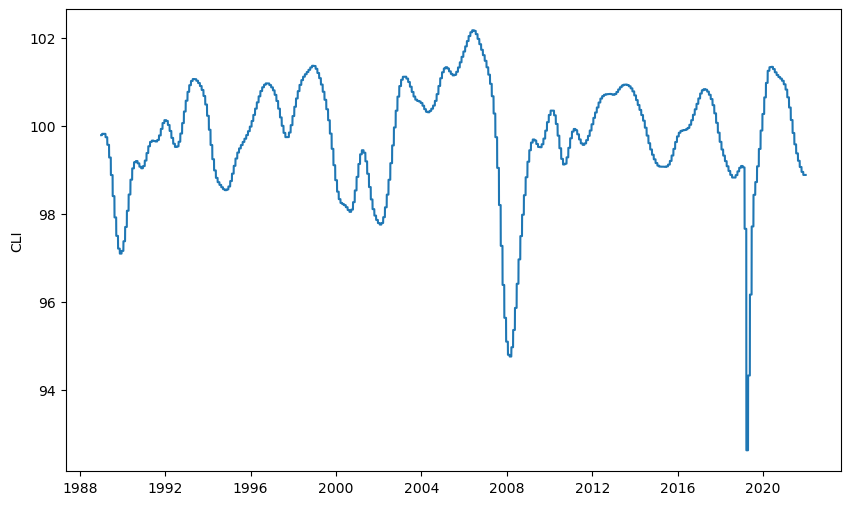

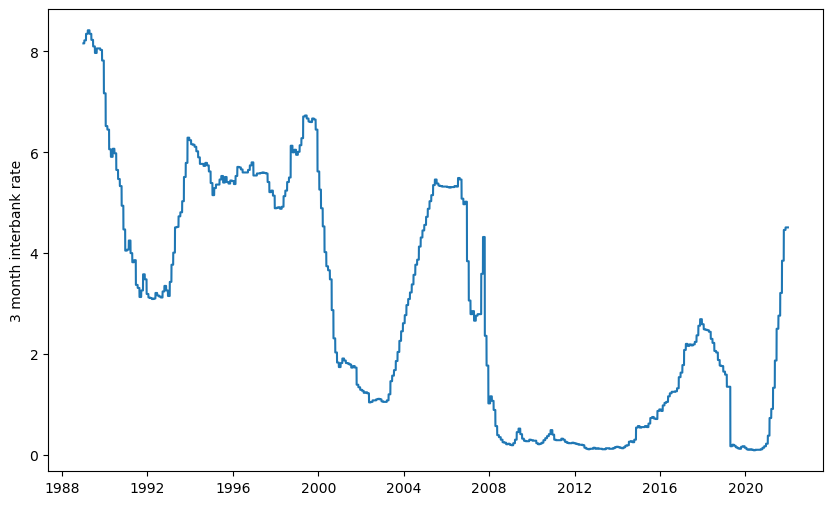

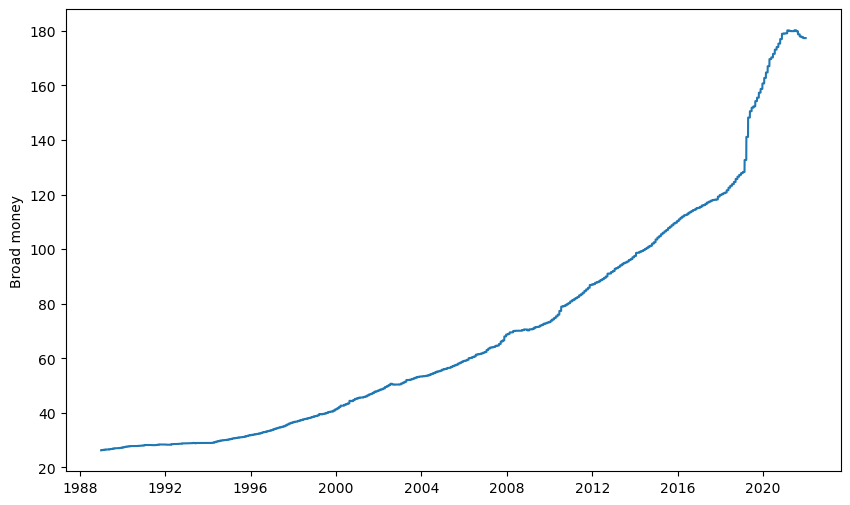

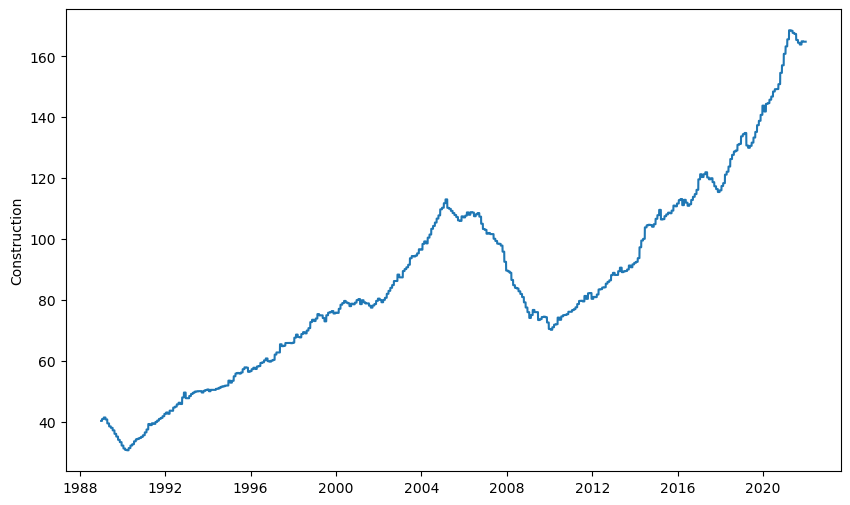

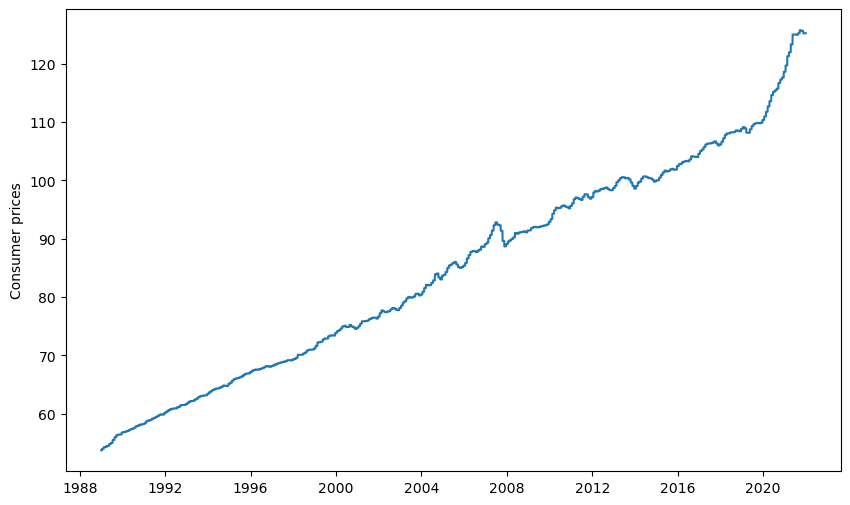

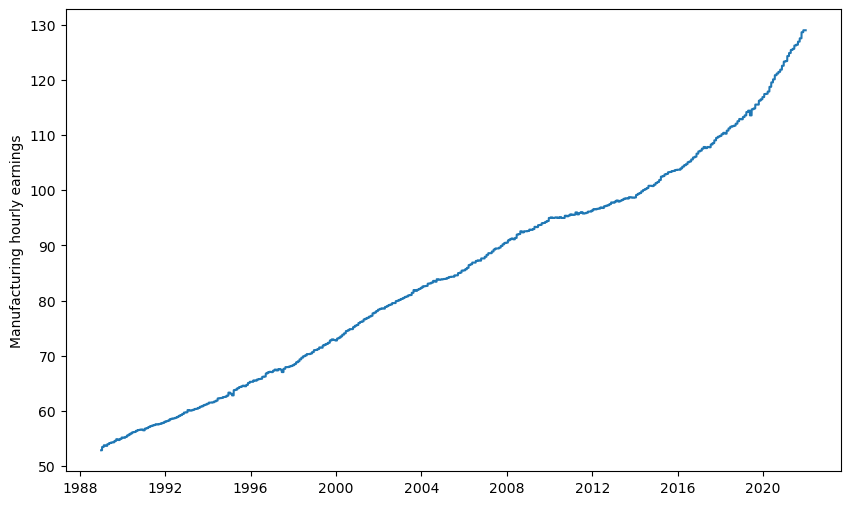

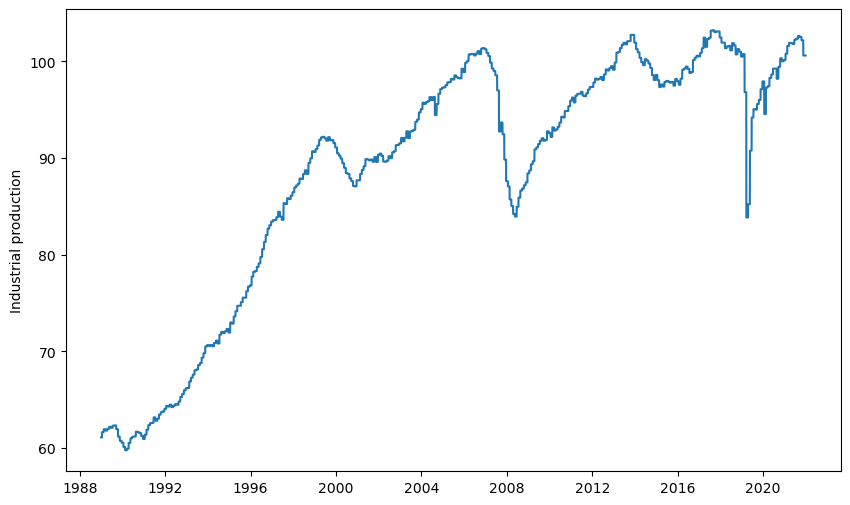

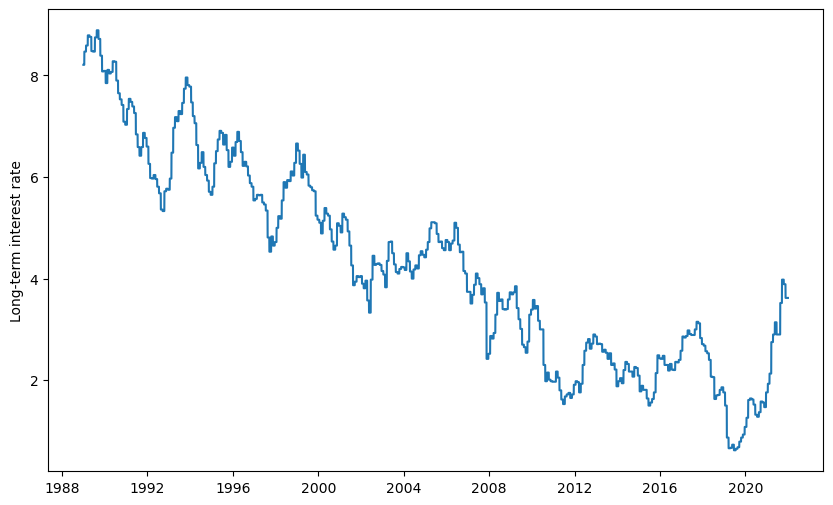

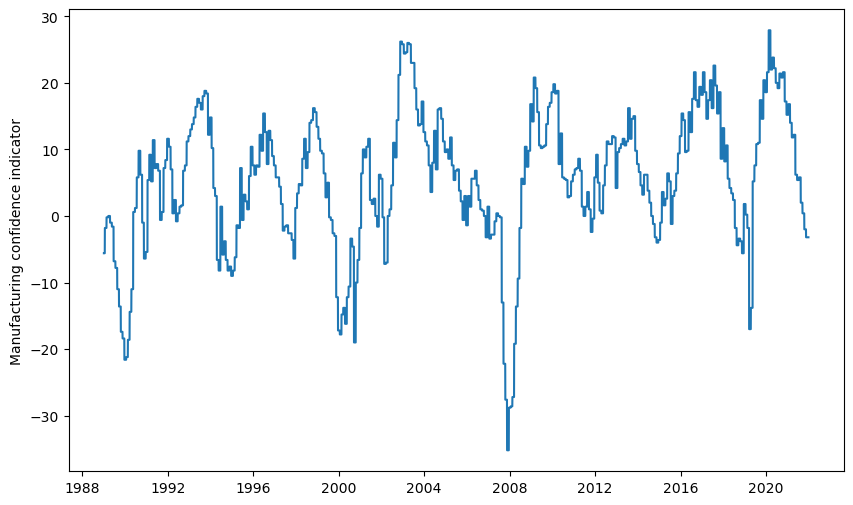

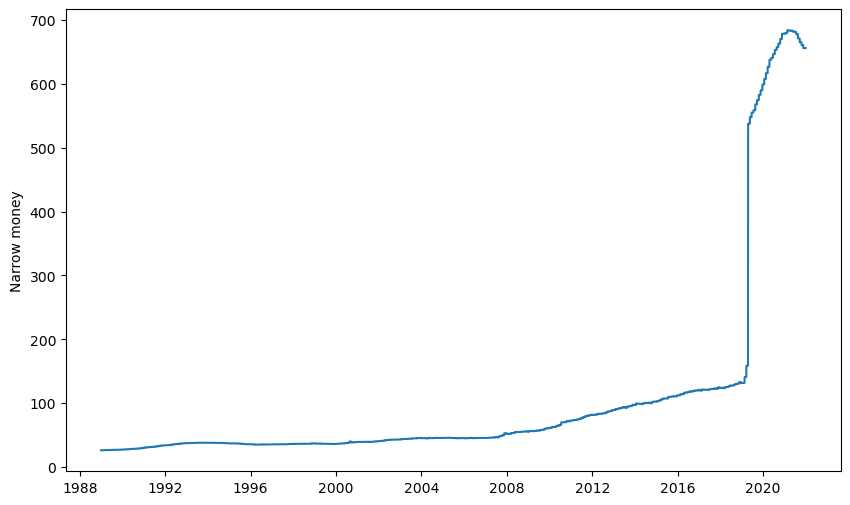

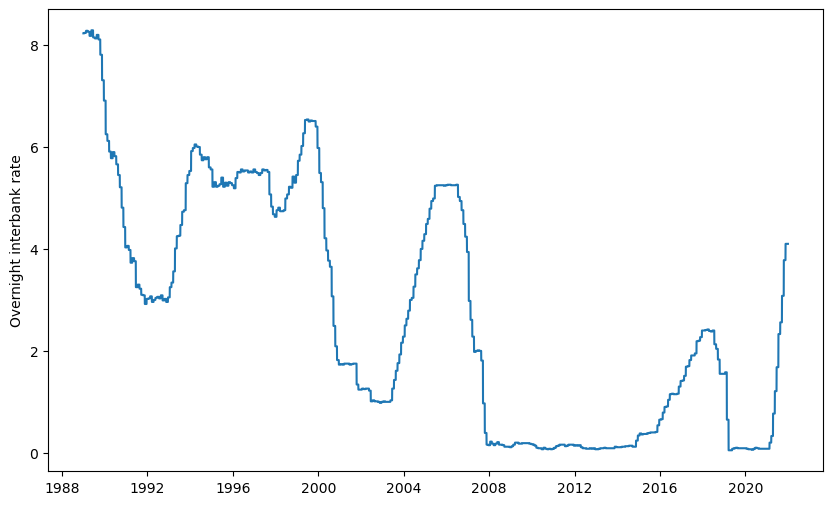

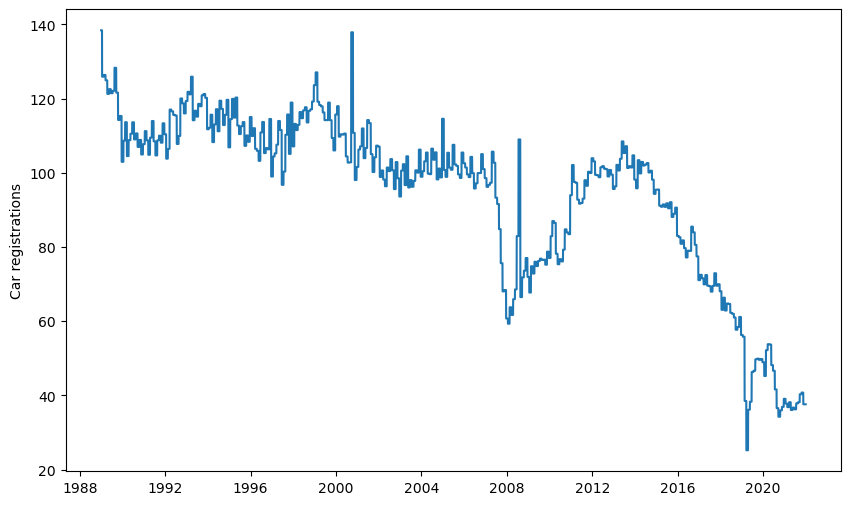

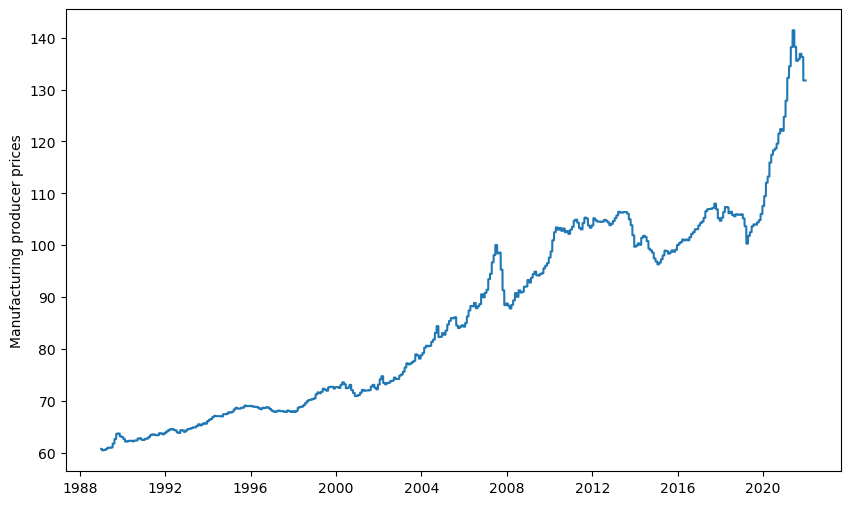

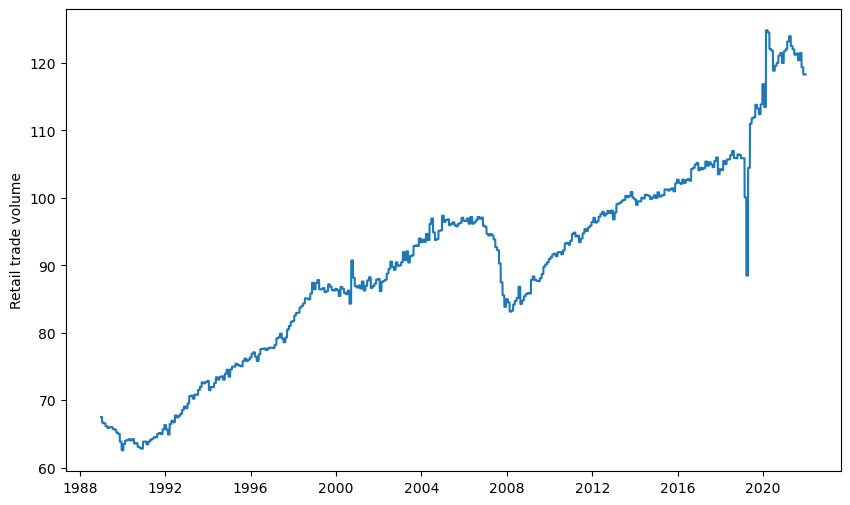

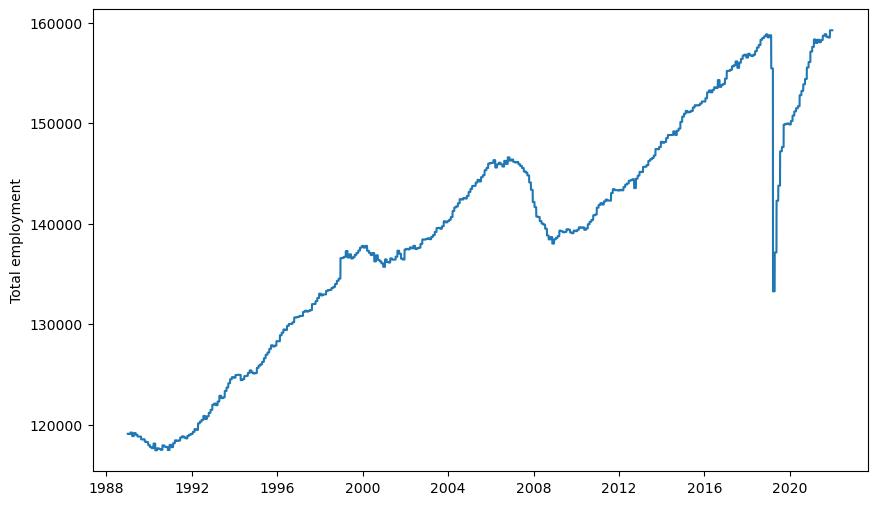

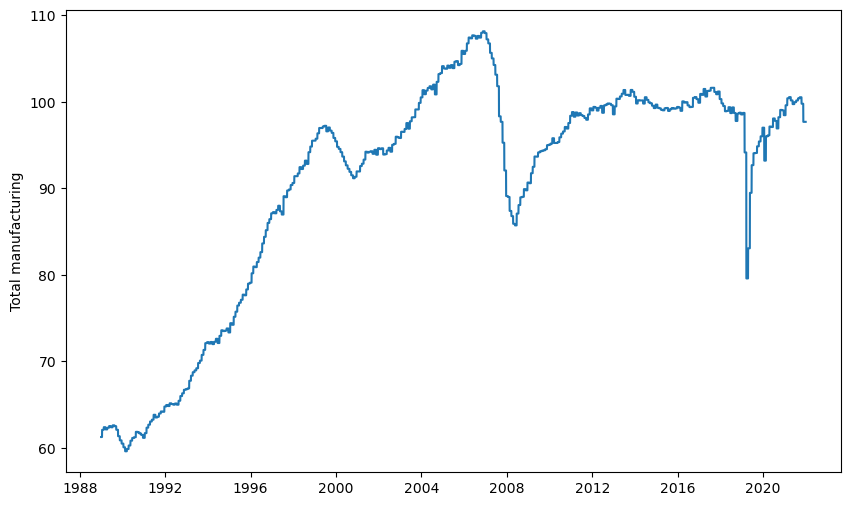

In [7]:
for feature in features:
    plt.figure(figsize=(10,6))
    sns.lineplot(data=features, x=features.index, y=feature)
    plt.show()

# Correlation matrix between features

In [8]:
def plot_correlation_matrix_of_df(df, columns_order, annot = True):
    '''Uses the seaborn heatmap to plot the correlation matrix of a pandas dataframe'''
    # Sort columns based on column column name
    df = df[columns_order]

    # Calculate correlation matrix
    corrs = df.corr().round(2)
    
    # Since this is a symmetric table, set up a mask so that we only plot values below the main diagonal.
    mask = np.triu(np.ones_like(corrs, dtype=bool))
    f, ax = plt.subplots(figsize=(10, 8)) # Initialise the plots and axes

    # Plot the correlations as a seaborn heatmap, with a colourbar.
    sns.heatmap(corrs, mask=mask, center=0, annot=annot, square=True, linewidths=.5, cmap="seismic", vmin = -1, vmax = 1)

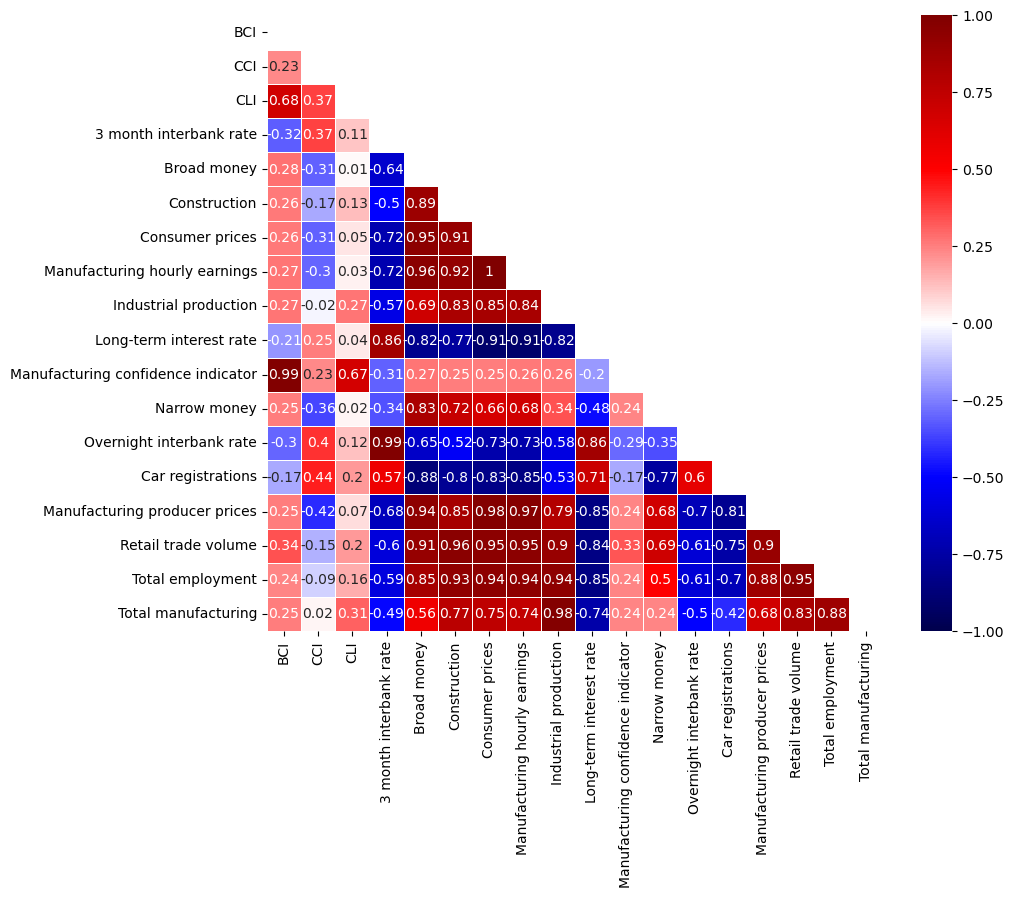

In [9]:
plot_correlation_matrix_of_df(features, features.columns,annot = True)

# Relationship between features and stock price

## Data manipulation

In [10]:
data['Date'] = data.index

In [11]:
data_melted = data.melt(id_vars=['Date']).set_index('Date')
data_melted.columns = ["stock", "price"]
data_melted

,stock,price
Date,,
1990-01-02,AAPL,NaN
1990-01-03,AAPL,NaN
1990-01-04,AAPL,NaN
1990-01-05,AAPL,NaN
1990-01-08,AAPL,NaN
...,...,...
2022-12-20,FG,142.470001
2022-12-21,FG,144.919998
2022-12-22,FG,145.029999


In [12]:
# Remove all rows where price is nan
data_melted = data_melted.dropna(subset=['price'])
data_melted

,stock,price
Date,,
1999-11-18,AAPL,27.066582
1999-11-19,AAPL,24.836662
1999-11-22,AAPL,27.066582
1999-11-23,AAPL,24.605980
1999-11-24,AAPL,25.259573
...,...,...
2022-12-20,FG,142.470001
2022-12-21,FG,144.919998
2022-12-22,FG,145.029999


In [13]:
sector = []
for s in data_melted["stock"]:
    sector.append(cats[s][0])

data_melted["sector"] = sector
data_melted

C:\Users\nisha\AppData\Local\Temp\ipykernel_3576\939220257.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_melted["sector"] = sector


,stock,price,sector
Date,,,
1999-11-18,AAPL,27.066582,Information Technology
1999-11-19,AAPL,24.836662,Information Technology
1999-11-22,AAPL,27.066582,Information Technology
1999-11-23,AAPL,24.605980,Information Technology
1999-11-24,AAPL,25.259573,Information Technology
...,...,...,...
2022-12-20,FG,142.470001,Financials
2022-12-21,FG,144.919998,Financials
2022-12-22,FG,145.029999,Financials


In [14]:
data_melted[features.columns] = np.full((len(data_melted), len(features.columns)), np.nan)
data_melted

C:\Users\nisha\AppData\Local\Temp\ipykernel_3576\630380220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_melted[features.columns] = np.full((len(data_melted), len(features.columns)), np.nan)
C:\Users\nisha\AppData\Local\Temp\ipykernel_3576\630380220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_melted[features.columns] = np.full((len(data_melted), len(features.columns)), np.nan)
C:\Users\nisha\AppData\Local\Temp\ipykernel_3576\630380220.py:1: SettingWithCopyWarning: 
A value is trying 

,stock,price,sector,BCI,CCI,CLI,3 month interbank rate,Broad money,Construction,Consumer prices,...,Industrial production,Long-term interest rate,Manufacturing confidence indicator,Narrow money,Overnight interbank rate,Car registrations,Manufacturing producer prices,Retail trade volume,Total employment,Total manufacturing
Date,,,,,,,,,,,,,,,,,,,,,
1999-11-18,AAPL,27.066582,Information Technology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-11-19,AAPL,24.836662,Information Technology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-11-22,AAPL,27.066582,Information Technology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-11-23,AAPL,24.605980,Information Technology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-11-24,AAPL,25.259573,Information Technology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-20,FG,142.470001,Financials,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-21,FG,144.919998,Financials,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-22,FG,145.029999,Financials,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
dates_in_data_melted = set(data_melted.index)
for date in tqdm(features.index):
    if date in dates_in_data_melted:
        try:
            data_melted.loc[date,"BCI":] = features.loc[date,:].values
        except KeyError:
            pass

data_melted

  0%|          | 0/12049 [00:00<?, ?it/s]

,stock,price,sector,BCI,CCI,CLI,3 month interbank rate,Broad money,Construction,Consumer prices,...,Industrial production,Long-term interest rate,Manufacturing confidence indicator,Narrow money,Overnight interbank rate,Car registrations,Manufacturing producer prices,Retail trade volume,Total employment,Total manufacturing
Date,,,,,,,,,,,,,,,,,,,,,
1999-11-18,AAPL,27.066582,Information Technology,98.04897,101.6224,99.11023,6.45,40.887996,75.621348,73.412456,...,91.539687,5.24,-12.2,36.028761,6.4,106.023776,72.379413,86.25658,137614.0,95.82173
1999-11-19,AAPL,24.836662,Information Technology,98.04897,101.6224,99.11023,6.45,40.887996,75.621348,73.412456,...,91.539687,5.24,-12.2,36.028761,6.4,106.023776,72.379413,86.25658,137614.0,95.82173
1999-11-22,AAPL,27.066582,Information Technology,98.04897,101.6224,99.11023,6.45,40.887996,75.621348,73.412456,...,91.539687,5.24,-12.2,36.028761,6.4,106.023776,72.379413,86.25658,137614.0,95.82173
1999-11-23,AAPL,24.605980,Information Technology,98.04897,101.6224,99.11023,6.45,40.887996,75.621348,73.412456,...,91.539687,5.24,-12.2,36.028761,6.4,106.023776,72.379413,86.25658,137614.0,95.82173
1999-11-24,AAPL,25.259573,Information Technology,98.04897,101.6224,99.11023,6.45,40.887996,75.621348,73.412456,...,91.539687,5.24,-12.2,36.028761,6.4,106.023776,72.379413,86.25658,137614.0,95.82173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-20,FG,142.470001,Financials,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-21,FG,144.919998,Financials,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-22,FG,145.029999,Financials,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Creating plot

In [16]:
# Unfortunately, it takes too much time to create the plot if the dataframe is not resampled to monthly
data_melted = data_melted.resample("1M").mean()
data_melted

,price,BCI,CCI,CLI,3 month interbank rate,Broad money,Construction,Consumer prices,Manufacturing hourly earnings,Industrial production,Long-term interest rate,Manufacturing confidence indicator,Narrow money,Overnight interbank rate,Car registrations,Manufacturing producer prices,Retail trade volume,Total employment,Total manufacturing
Date,,,,,,,,,,,,,,,,,,,
1990-01-31,4.563237,96.979560,98.266170,97.271505,6.845000,27.364655,31.809476,56.831367,55.141517,60.341210,7.970000,-21.400000,27.466717,6.580000,105.811251,62.813258,63.029492,117847.500000,60.271647
1990-02-28,4.484436,97.108622,98.927419,97.535416,6.486774,27.502960,31.111305,56.913610,55.187941,59.960216,7.973411,-19.965886,27.651906,6.188294,111.025072,62.394399,63.731051,117706.110107,59.839961
1990-03-31,4.554004,97.445975,99.400918,97.873726,6.272538,27.618516,30.811423,56.996336,55.381435,59.852072,8.078148,-16.688869,27.824229,6.024443,109.476503,62.164108,64.022972,117859.949243,59.716187
1990-04-30,4.577428,98.029818,99.503007,98.277784,5.977444,27.714456,31.135499,57.135206,55.628948,60.265964,8.056511,-12.528723,28.007418,5.838451,106.864870,62.252803,64.139573,117740.798636,60.082591
1990-05-31,4.696568,98.632745,99.525062,98.597094,5.982801,27.787644,31.836783,57.287875,55.810753,60.756772,8.165551,-5.721956,28.211206,5.834600,109.585581,62.301267,64.116897,117530.545752,60.520378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,132.369113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-30,123.050017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-31,120.280939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Identify the columns to include in the dropdown menu
x_features = data_melted.columns[1:]

# Create the scatter plot
fig = px.scatter(data_melted, 
                 x=x_features[0],  # Initial x-axis feature
                 y='price', 
                 title='Stock Price vs. Economic Indicators')

# Update layout to add dropdown menu for selecting x-axis feature
fig.update_layout(
    updatemenus=[
        dict(
            buttons=[dict(method='restyle',
                          label=feature,
                          args=[{'x': [data_melted[feature]]}]) for feature in x_features],
            direction='down',
            showactive=True,
        )
    ]
)

# Show the figure
fig.show()